In [ ]:
%cd ..

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import os
import os.path as op
import mne
import numpy as np
import pandas as pd

In [2]:
%matplotlib qt

In [3]:
test = np.load('sessions/Erno/session_08/data.npy')

In [10]:
EEG = test[2:]
EEG.shape
EEG/=1000*1000 #(µV->V)
test[2:] = EEG

In [11]:
sfreq = 250
event_id = {"rest": 1, "left": 2, "right": 3, "trial_end": 10}


ch_names = ["STIM", "Fz", "C3", "Cz", "C4", "Pz", "PO7", "Oz", "PO8"]  # documentation
#ch_names = ["STIM", "Fp1", "FC1", "FC2", "FCz", "CPz", "CP1", "CP2", "Pz"] # API

info = mne.create_info(ch_names=ch_names, sfreq=sfreq)

raw = mne.io.RawArray(test[1:10], info) # Drop timestamp channel
info.ch_names


Creating RawArray with float64 data, n_channels=9, n_times=112350
    Range : 0 ... 112349 =      0.000 ...   449.396 secs
Ready.


['STIM', 'Fz', 'C3', 'Cz', 'C4', 'Pz', 'PO7', 'Oz', 'PO8']

In [12]:
for ch in info.ch_names:
    if ch == 'STIM':
        raw.set_channel_types({ch:'stim'})
    else:
        raw.set_channel_types({ch:'eeg'})


C:\Users\Nemes\AppData\Local\Temp\ipykernel_1128\3885111031.py:5: RuntimeWarning: The unit for channel(s) Fz has changed from NA to V.
  raw.set_channel_types({ch:'eeg'})
C:\Users\Nemes\AppData\Local\Temp\ipykernel_1128\3885111031.py:5: RuntimeWarning: The unit for channel(s) C3 has changed from NA to V.
  raw.set_channel_types({ch:'eeg'})
C:\Users\Nemes\AppData\Local\Temp\ipykernel_1128\3885111031.py:5: RuntimeWarning: The unit for channel(s) Cz has changed from NA to V.
  raw.set_channel_types({ch:'eeg'})
C:\Users\Nemes\AppData\Local\Temp\ipykernel_1128\3885111031.py:5: RuntimeWarning: The unit for channel(s) C4 has changed from NA to V.
  raw.set_channel_types({ch:'eeg'})
C:\Users\Nemes\AppData\Local\Temp\ipykernel_1128\3885111031.py:5: RuntimeWarning: The unit for channel(s) Pz has changed from NA to V.
  raw.set_channel_types({ch:'eeg'})
C:\Users\Nemes\AppData\Local\Temp\ipykernel_1128\3885111031.py:5: RuntimeWarning: The unit for channel(s) PO7 has changed from NA to V.
  raw.set

In [13]:
raw.describe()

<RawArray | 9 x 112350 (449.4 s), ~7.7 MB, data loaded>
ch  name  type  unit        min         Q1     median         Q3        max
 0  STIM  STIM  NA         0.00       0.00       0.00       0.00      10.00
 1  Fz    EEG   µV    115920.89  116606.38  116682.91  116798.95  750000.06
 2  C3    EEG   µV     68549.85  122152.65  122220.20  122359.98  750000.06
 3  Cz    EEG   µV    129036.54  129133.37  129194.87  129477.23  750000.06
 4  C4    EEG   µV     43691.85  111975.87  112606.44  113650.91  750000.06
 5  Pz    EEG   µV    -403478.16  121511.24  121585.36  121678.08  750000.06
 6  PO7   EEG   µV    -613008.88  104002.76  104137.32  104405.80  750000.06
 7  Oz    EEG   µV    -468693.84  112842.70  112869.25  112896.97  750000.06
 8  PO8   EEG   µV    143881.05  144626.17  144696.34  144769.84  750000.06


In [14]:
raw.set_montage('standard_1020')

<RawArray | 9 x 112350 (449.4 s), ~7.7 MB, data loaded>

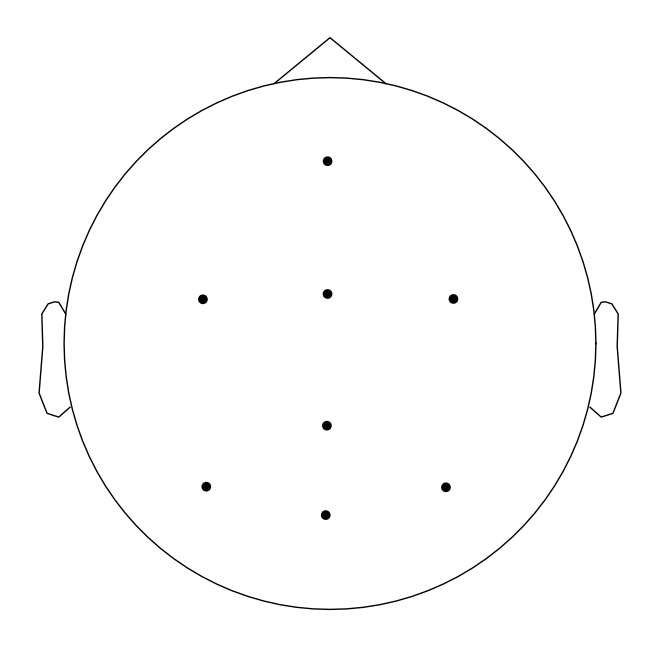

In [15]:
raw.plot_sensors()

In [71]:
epochs['Left'].plot_image()

Not setting metadata
40 matching events found
No baseline correction applied
0 projection items activated
combining channels using "gfp"


[<Figure size 640x480 with 3 Axes>]

In [72]:
epochs['Left'].plot_image()

Not setting metadata
40 matching events found
No baseline correction applied
0 projection items activated
combining channels using "gfp"


[<Figure size 640x480 with 3 Axes>]

In [64]:
def create_epochs(data):
    event_dict = {'Rest': 1, 'Left': 2, 'Right': 3}#,'EndOfEvent': 10}
    mapping =  {1: 'Rest', 2: 'Left', 3: 'Right'}#, 10:'EndOfEvent'}
    events = mne.find_events(data,stim_channel='STIM')
    annot_from_events = mne.annotations_from_events(
        events=events, event_desc=mapping, sfreq=raw.info['sfreq'])
    data.set_annotations(annot_from_events)
    return mne.Epochs(data, events, tmin=-0.3, tmax=2.0, event_id=event_dict,
                    preload=True)

In [65]:
filtered_epochs = create_epochs(eeg_data)

240 events found
Event IDs: [ 1  2  3 10]
Not setting metadata
120 matching events found
Setting baseline interval to [-0.3, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 120 events and 576 original time points ...
0 bad epochs dropped


    Using multitaper spectrum estimation with 7 DPSS windows
Averaging across epochs...


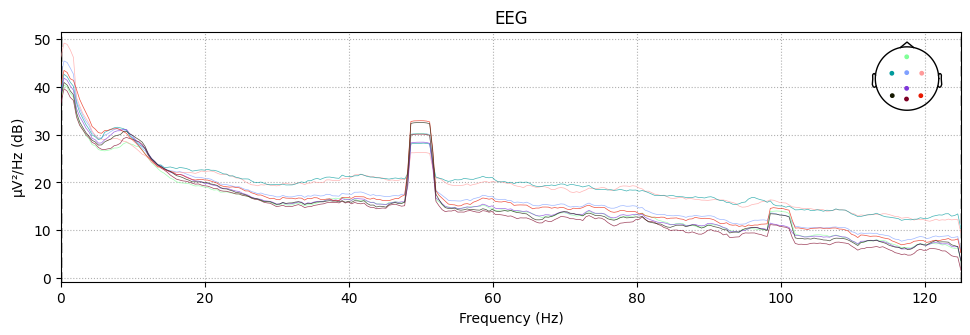

In [51]:
epochs['Left'].compute_psd().plot(picks='eeg')

    Using multitaper spectrum estimation with 7 DPSS windows
Averaging across epochs...


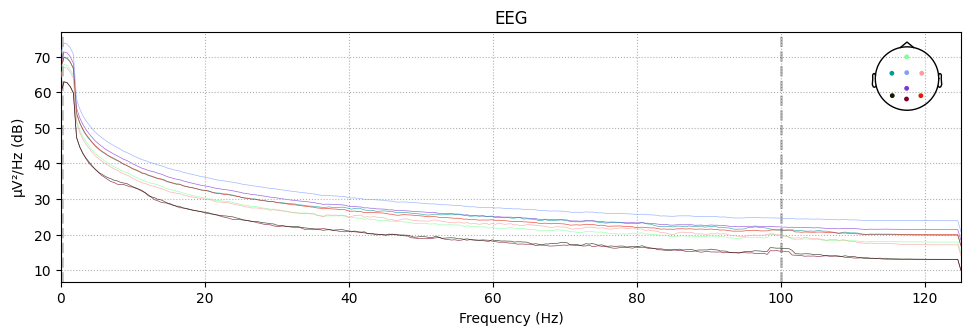

In [61]:
filtered_events['Left'].compute_psd().plot(picks='eeg')

    Using multitaper spectrum estimation with 7 DPSS windows


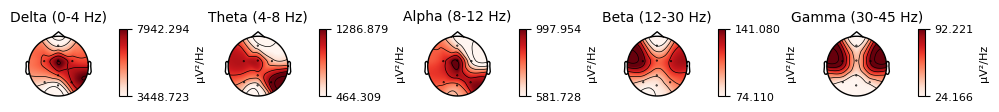

In [62]:
spectrum = filtered_events['Right'].compute_psd()
spectrum.plot_topomap()



    Using multitaper spectrum estimation with 7 DPSS windows


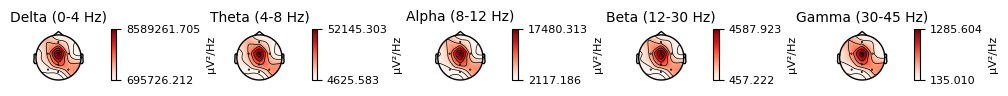

In [63]:
spectrum = filtered_events['Left'].compute_psd()
spectrum.plot_topomap()


In [58]:
eeg_data = raw.copy().filter(0.1, 100, fir_design='firwin')
eeg_data = eeg_data.notch_filter(50)


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 8251 samples (33.004 sec)

Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 49.38
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 49.12 Hz)
- Upper passband edge: 50.62 Hz
- Upper transition ba

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s finished


[2 1 2 2 3 2 1 3 3 1 2 2 2 2 2 3 2 3 2 1 3 3 3 3 2 3 1 1 3 1 3 2 1 1 2 2 3
 2 3 3 2 3 1 3 2 3 1 1 3 3 3 3 1 1 1 3 1 1 2 2 3 2 1 3 1 3 1 1 2 2 1 3 1 1
 3 3 1 3 1 2 1 2 1 1 3 1 3 2 1 2 3 1 1 2 1 1 2 1 3 3 1 2 2 2 2 2 2 3 3 2 1
 1 3 1 3 2 3 2 2 2]
Computing rank from data with rank=None
    Using tolerance 0.05 (2.2e-16 eps * 9 dim * 2.5e+13  max singular value)
    Estimated rank (mag): 9
    MAG: rank 9 computed from 9 data channels with 0 projectors
Reducing data rank from 9 -> 9
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 0.067 (2.2e-16 eps * 9 dim * 3.3e+13  max singular value)
    Estimated rank (mag): 9
    MAG: rank 9 computed from 9 data channels with 0 projectors
Reducing data rank from 9 -> 9
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 0.063 (2.2e-16 eps * 9 dim * 3.2e+13  max singular value)
    Estimated rank (mag): 9
    MAG: rank 9 computed from 9 data cha

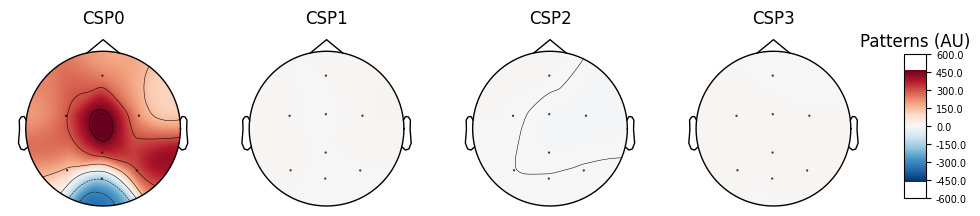

In [70]:
# Define a monte-carlo cross-validation generator (reduce variance):
from sklearn.pipeline import Pipeline
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import ShuffleSplit, cross_val_score
from mne import Epochs, pick_types, events_from_annotations
from mne.channels import make_standard_montage
from mne.io import concatenate_raws, read_raw_edf
from mne.datasets import eegbci
from mne.decoding import CSP

epochs = filtered_epochs
labels = epochs.events[:, -1]
print(labels)
input()
scores = []
epochs_data = epochs.get_data()
epochs_data_train = epochs.get_data()
cv = ShuffleSplit(10, test_size=0.2, random_state=42)
cv_split = cv.split(epochs_data_train)

# Assemble a classifier
lda = LinearDiscriminantAnalysis()
csp = CSP(n_components=4, reg=None, log=True, norm_trace=False)

# Use scikit-learn Pipeline with cross_val_score function
clf = Pipeline([('CSP', csp), ('LDA', lda)])
scores = cross_val_score(clf, epochs_data_train, labels, cv=cv, n_jobs=1)

# Printing the results
class_balance = np.mean(labels == labels[0])
class_balance = max(class_balance, 1. - class_balance)
print("Classification accuracy: %f / Chance level: %f" % (np.mean(scores),
                                                          class_balance))

# plot CSP patterns estimated on full data for visualization
csp.fit_transform(epochs_data, labels)

csp.plot_patterns(epochs.info, ch_type='eeg', units='Patterns (AU)', size=1.5)